# Key Objectives are:


__1. Explore the data – be creative and pay attention to the details. You need to provide the marketing team a better understanding of the characteristic features of respondents;__
2. Propose and describe a customer segmentation based on customers behaviors;
3. Create a predictive model which allows the company to maximize the profit of the next marketing campaign.

In [1]:
#Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# EDA

In this part of the project, I will only analyze the data and learn from it. There won't be any machine learning.

In [2]:
df_original = pd.read_csv('ml_project1_data.csv')
df_original.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df = df_original.copy()
pd.DataFrame(df.dtypes, columns=['Type'])

,Type
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


Now I am going to check whether a customer can be twice in the database or not. This is important to avoid repetition

In [4]:
#convert to datetime
df['Dt_Customer'] =pd.to_datetime(df['Dt_Customer'], format="%Y-%m-%d")

#count uniques
df['ID'].nunique()

2240

We see that the number of unique customers is the same as the number of rows. Great! Now to make my easier, let's add an age column to the dataframe

In [5]:
#check when was the last last purchase, so we can estimate what year this dataset was generated
print (df.Dt_Customer.min())
print (df.Dt_Customer.max())
df.Dt_Customer.max().year

2012-07-30 00:00:00
2014-06-29 00:00:00


2014

In [6]:
import datetime

df['Age'] = df.Dt_Customer.max().year-df["Year_Birth"]


In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,45.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000


The income max (666666.000000) seems a bit odd. Let's check Nans

In [8]:
pd.DataFrame(df.isna().mean().round(4) * 100)

,0
ID,0.00
Year_Birth,0.00
Education,0.00
Marital_Status,0.00
Income,1.07
Kidhome,0.00
Teenhome,0.00
Dt_Customer,0.00
Recency,0.00
MntWines,0.00


We see that income has some NaNs in the data

In [9]:
df[df.isnull().any(axis=1)]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,0,3,11,0,31
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,0,3,11,0,28
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,0,3,11,0,55
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,0,3,11,0,63
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,0,3,11,0,32
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,0,0,3,11,0,41
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,0,0,3,11,0,57
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,0,0,3,11,0,57
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,0,0,3,11,0,41
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,0,0,3,11,0,53


There's only 24 NaNs in the dataset, so I will add the median to the missing value in income. This way I won't change much the distribution.

In [10]:
#Now let's check the largest incomes
df.nlargest(5,['Income'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,0,3,11,0,37
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,0,3,11,0,38
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,0,3,11,0,32
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,0,3,11,0,43
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,3,11,0,41


As we saw before in describe, the largest income (666666.0) is probably a typing error, so we will set it as a NaN

In [11]:
df.loc[df['Income'] == 666666.0,'Income'] = np.nan

#Set the median to the missing values
df['Income'] = df['Income'].fillna(df['Income'].median())

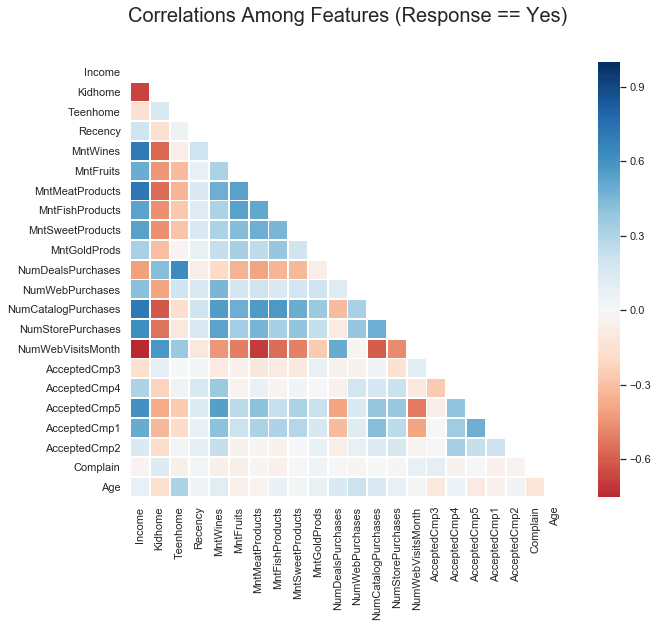

In [12]:
## check  correlation

df_mask = df[df.Response == 1]
mask = np.zeros_like(df_mask.drop(['Z_CostContact','Z_Revenue','ID','Year_Birth','Response'],axis=1).corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (12,8))
sns.heatmap(df_mask.drop(['Z_CostContact','Z_Revenue','ID','Year_Birth','Response'],axis=1).corr(), 
            annot=False,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.8, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features (Response == Yes)", y = 1.03,fontsize = 20, pad = 40)

#workaround for boxes being cut
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show();

Let's check the distribution for income and recency

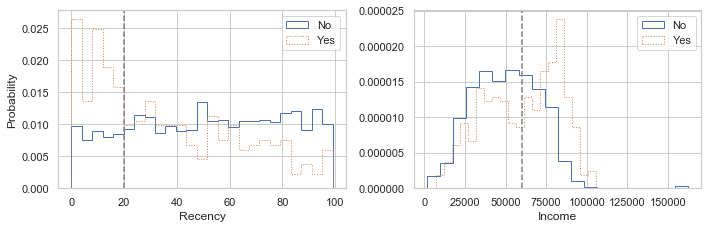

In [13]:
f, ax = plt.subplots(figsize=(10, 6))

ax1 = plt.subplot(2,2,1)
bins=25
plt.hist(df[df.Response == 0].Recency, bins=bins, label="No", density=True, histtype="step", lw=1)
plt.hist(df[df.Response == 1].Recency, bins=bins, label="Yes", density=True, histtype="step", ls=":")
plt.axvline(x=20, color='gray', linestyle='--')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Recency')
ax1.legend()

ax2 = plt.subplot(2,2,2)
bins=20
plt.hist(df[df.Response == 0].Income, bins=bins, label="No", density=True, histtype="step", lw=1)
plt.hist(df[df.Response == 1].Income, bins=bins, label="Yes", density=True, histtype="step", ls=":")
plt.axvline(x=60000, color='gray', linestyle='--')
ax2.set_xlabel('Income')


ax2.legend()
plt.tight_layout();

There are many outliers in the distribution. We must be careful depending on which model we apply.

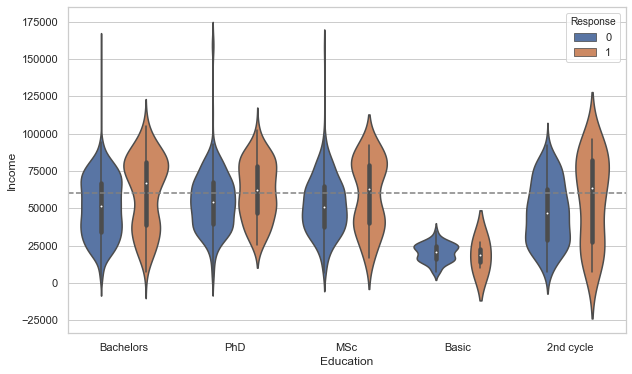

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(y='Income', x='Education', hue="Response", data=df)
ax.set_xticklabels(['Bachelors','PhD','MSc','Basic','2nd cycle'])
plt.axhline(y=60000, color='gray', linestyle='--');

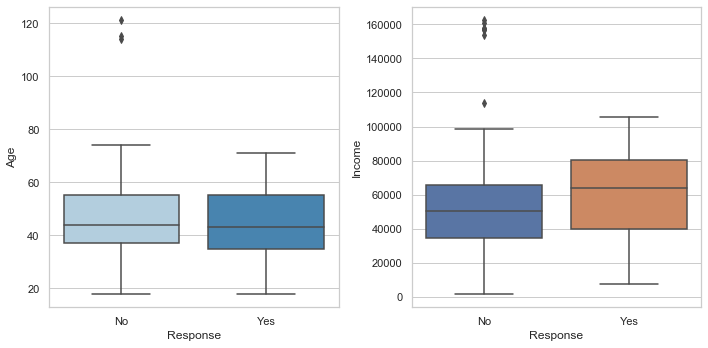

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
plt.subplot(1,2,1)
ax1 = sns.boxplot(y='Age', x='Response', data=df,palette="Blues")
ax1.set_xticklabels(['No','Yes'])
plt.subplot(1,2,2)
ax2 = sns.boxplot(y='Income', x='Response', data=df)
ax2.set_xticklabels(['No','Yes'])
plt.tight_layout();

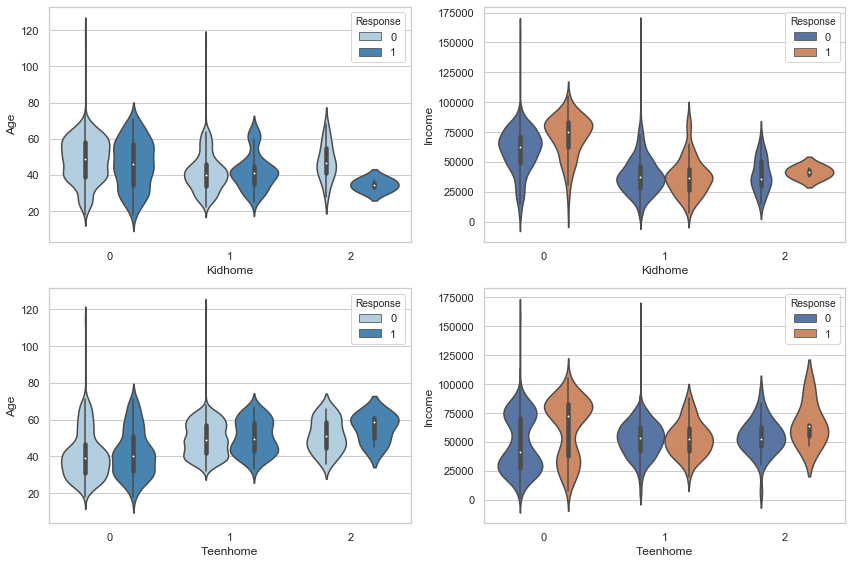

In [16]:
f, ax = plt.subplots(figsize=(12, 8))

plt.subplot(2,2,1)
sns.violinplot(x="Kidhome", y="Age", hue="Response", data=df,palette="Blues",split=False)
plt.subplot(2,2,2)
sns.violinplot(x="Kidhome", y="Income", hue="Response", data=df,split=False)
plt.subplot(2,2,3)
sns.violinplot(x="Teenhome", y="Age", hue="Response", data=df,palette="Blues",split=False)
plt.subplot(2,2,4)
sns.violinplot(x="Teenhome", y="Income", hue="Response", data=df,split=False)
plt.tight_layout();

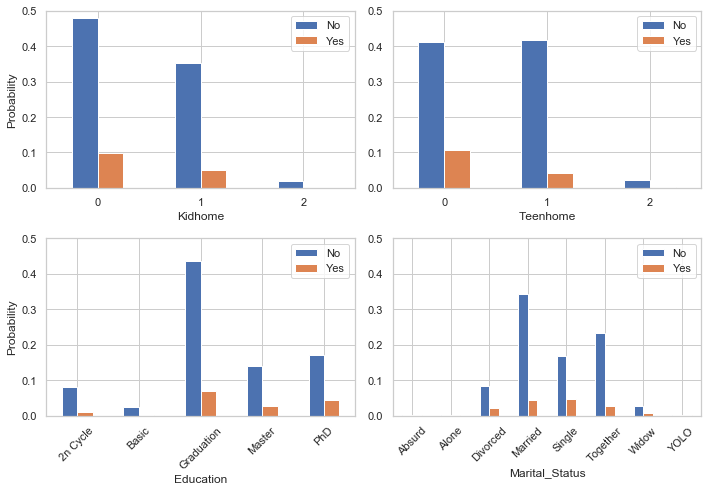

In [17]:
def prob_df(variable):
    rating_probs_no = pd.DataFrame(df[df.Response == 0].groupby(variable).size().div(len(df)))
    rating_probs_yes = pd.DataFrame(df[df.Response == 1].groupby(variable).size().div(len(df)))
    df_2 = rating_probs_no.merge(rating_probs_yes,how='outer',left_index=True, right_index=True)
    df_2.columns = ['No', 'Yes']
    return df_2

#plot

fig, axes = plt.subplots(2,2,figsize=(10, 7))
prob_df('Kidhome').plot(ax=axes[0,0],kind='bar',ylim=(0,0.5),rot=0)
axes[0,0].set_ylabel('Probability')
prob_df('Teenhome').plot(ax=axes[0,1], kind='bar',ylim=(0,0.5),rot=0)
prob_df('Education').plot(ax=axes[1,0], kind='bar',ylim=(0,0.5),rot=45)
axes[1,0].set_ylabel('Probability')
prob_df('Marital_Status').plot(ax=axes[1,1], kind='bar',ylim=(0,0.5),rot=45)
plt.tight_layout();
    

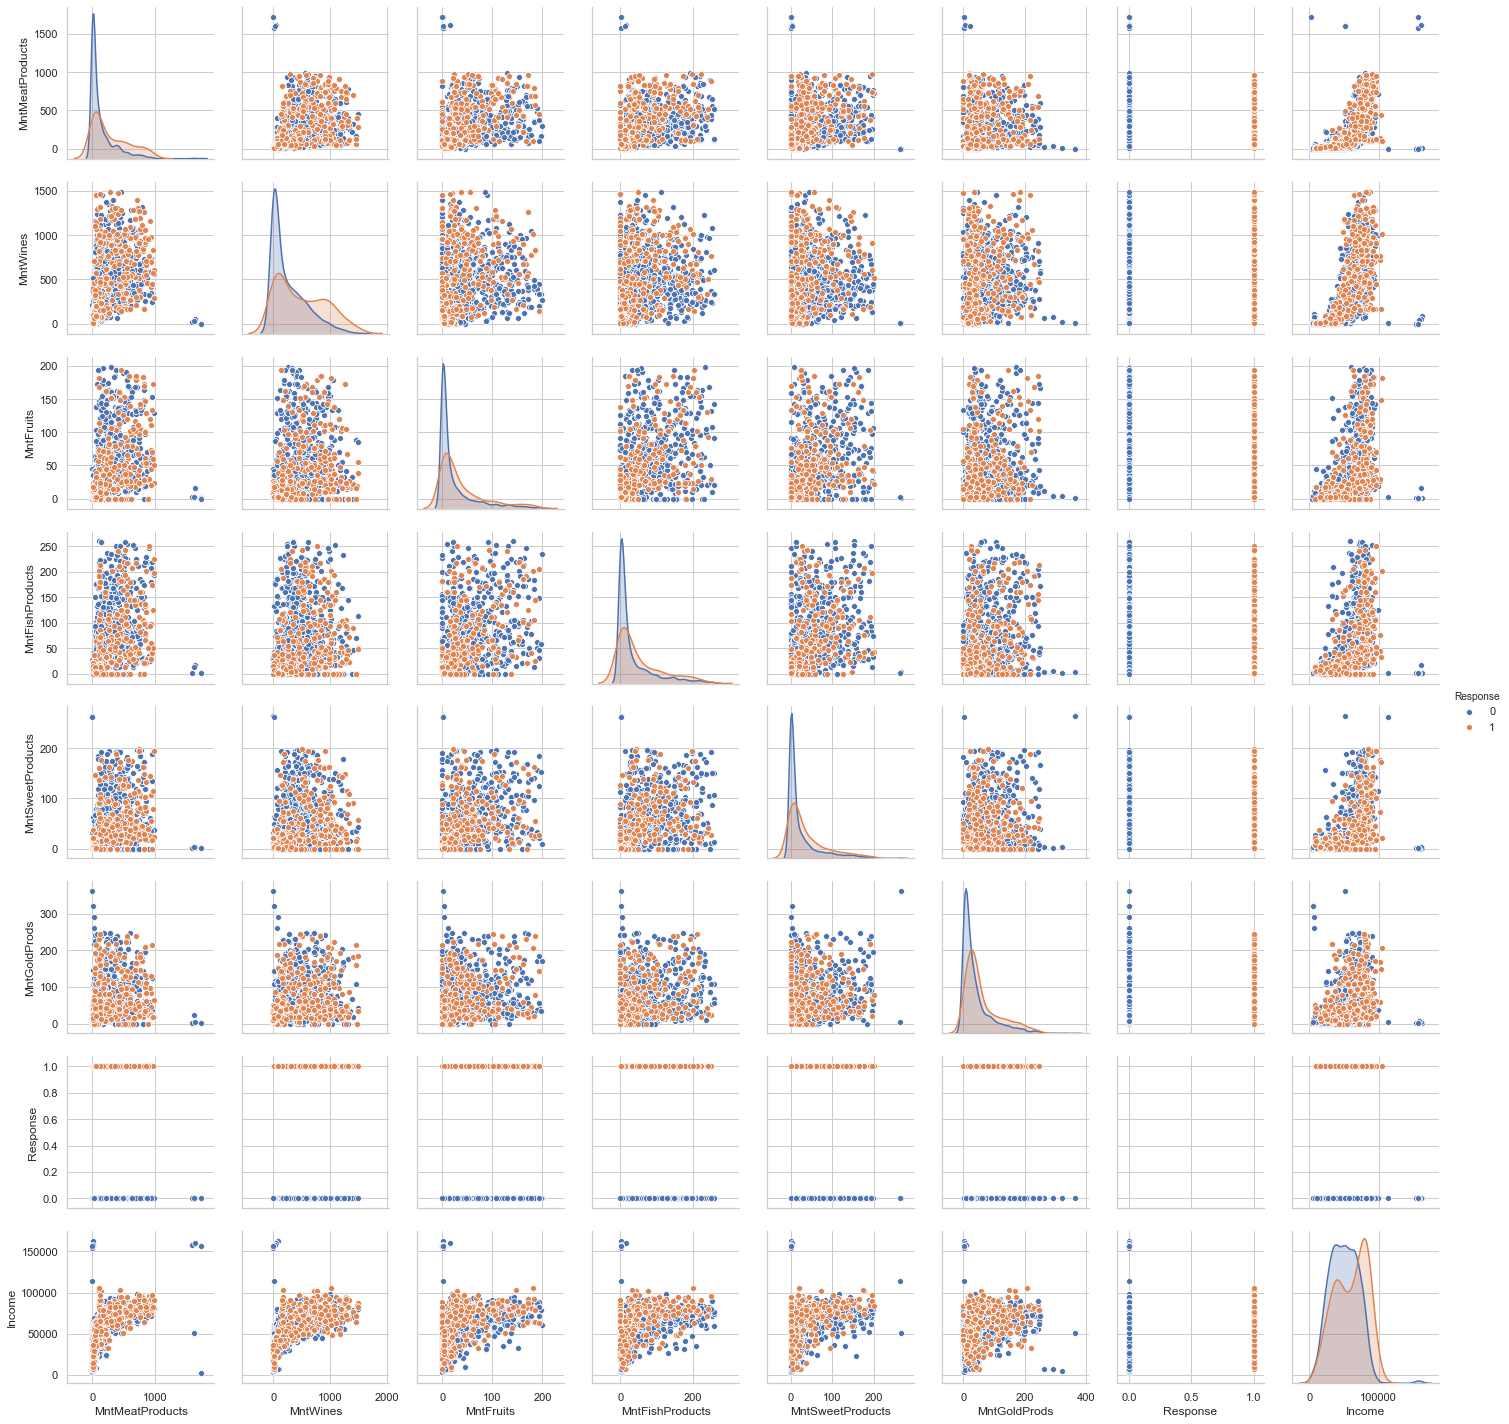

In [20]:
select = df[['MntMeatProducts','MntWines','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds',
             'Response','Income']]

sns.pairplot(select, hue="Response");

In [19]:
df.to_csv('/Users/mgermano/Documents/coding_test/ifood/project_model_cluster/output/dataset.csv', index=False) 
